In [1]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d  
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
import pandas as pd
 

In [3]:
# Dropdown menus
technique = ["Optical", "SEM", "Laser"]
#optical
modalities_OM = ["reflected", "transmitted"]
angles_OM = np.arange(0, 181, 15)

#SEM
modalities_SEM = ["EDX", "BSE", "SE"]
map_EDX = ["QuantMap", "TruMap", "PhaseMap"]
nElements = 28

#Laser
modes_Laser = ["TOF", "Quadrupole"]
#images
binningFactor = [1, 2, 4, 8, 16, 32, 64]
bitDepth = [8, 16, 24, 32, 64]
nIsotopes = 0 #not used

In [47]:
sample = "MBS-4"

# Layers
experiments = []

#OM RL PPL
exp_type = technique[0]+ " " +modalities_OM[0]+ " " + str(angles_OM[0])
exp_bitDepth = bitDepth[0]
exp_binningFactor = binningFactor[0]
exp_channels = 3*len(angles_OM[0:1])
exp_spatialResolution = 0.58
exp_width = 73271
exp_height = 44296
exp_tileWidth = 4908
exp_tileHeight = 3264
exp_overlap = 15
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

#BSE
exp_type = technique[1]+ " " +modalities_SEM[1]
exp_bitDepth = bitDepth[0]
exp_binningFactor = binningFactor[0]
exp_channels = 1
exp_spatialResolution = 2.6
exp_width = 15943
exp_height = 9265
exp_tileWidth = 768
exp_tileHeight = 768
exp_overlap = 15
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

#TruMap
exp_type = technique[1]+ " " +modalities_SEM[0]+ " " +map_EDX[1]
exp_bitDepth = bitDepth[1]
exp_binningFactor = binningFactor[0]
exp_channels = nElements
exp_spatialResolution = 3.91
exp_width = 9267
exp_height = 5913
exp_tileWidth = 512
exp_tileHeight = 384
exp_overlap = 15
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

#PhaseMap
exp_type = technique[1]+ " " +modalities_SEM[0]+ " " +map_EDX[2]
exp_bitDepth = bitDepth[0]
exp_binningFactor = binningFactor[0]
exp_channels = 1
exp_angles = angles_OM[0]
exp_spatialResolution = 3.91
exp_width = 9267
exp_height = 5913
exp_tileWidth = 512
exp_tileHeight = 384
exp_overlap = 15
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

#QuantMap
exp_type = technique[1]+ " " +modalities_SEM[0]+ " " +map_EDX[0]
exp_bitDepth = bitDepth[3]
exp_binningFactor = binningFactor[1]
exp_channels = nElements
exp_spatialResolution = 3.91
exp_width = 9267
exp_height = 5913
exp_tileWidth = 512
exp_tileHeight = 384
exp_overlap = 15
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

#LA-ICP-Q-MS mapping
exp_type = technique[2]+ " " +modes_Laser[1]
exp_bitDepth = bitDepth[3]
exp_binningFactor = binningFactor[0]
exp_channels = nIsotopes
exp_spatialResolution = 8
exp_width = 100
exp_height = 100
exp_tileWidth = np.nan
exp_tileHeight = np.nan
exp_overlap = np.nan
layer = [exp_type, exp_bitDepth, exp_channels, exp_spatialResolution,
         exp_binningFactor, exp_width, exp_height, exp_tileWidth, 
         exp_tileHeight, exp_overlap]
experiments.append(layer)

dfPyramid = pd.DataFrame(experiments, 
                         columns=['Layer', 'Bit depth', 'Num. channels', 
                                  'Spatial resolution', 'Binning factor', 'Width',
                                  'Height', 'Tile width', 'Tile height', 
                                  'Overlap'])

dfPyramid['Columns'] = np.ceil(100*dfPyramid['Width']/(dfPyramid['Tile width']*(100-dfPyramid['Overlap'])))
dfPyramid['Rows'] = np.ceil(100*dfPyramid['Height']/(dfPyramid['Tile height']*(100-dfPyramid['Overlap'])))

dfPyramid

,Layer,Bit depth,Num. channels,Spatial resolution,Binning factor,Width,Height,Tile width,Tile height,Overlap,Columns,Rows
0,Optical reflected 0,8,3,0.58,1,73271,44296,4908.0,3264.0,15.0,18.0,16.0
1,SEM BSE,8,1,2.60,1,15943,9265,768.0,768.0,15.0,25.0,15.0
2,SEM EDX TruMap,16,28,3.91,1,9267,5913,512.0,384.0,15.0,22.0,19.0
3,SEM EDX PhaseMap,8,1,3.91,1,9267,5913,512.0,384.0,15.0,22.0,19.0
4,SEM EDX QuantMap,32,28,3.91,2,9267,5913,512.0,384.0,15.0,22.0,19.0
5,Laser Quadrupole,32,0,8.00,1,100,100,NaN,NaN,NaN,NaN,NaN


In [51]:
#selecting reference layer
index = 0
width_ref = dfPyramid.loc[index]['Width']
height_ref = dfPyramid.loc[index]['Height']

# General settings for reference pyramid (OME-TIFF)
zSeries = 1
timeSeries = 1
compression = "JPEG"
compression_quality = 90
nLevels = 10


In [54]:
base = pd.Series([2]*nLevels)
exponent = pd.Series(np.arange(0, nLevels))
pyramid_scale = base.pow(exponent)

bytes = 0
for i in range(0, nLevels):
    temp = (dfPyramid.iloc[refIndex][2] * zSeries * timeSeries * width_ref * 
            height_ref * dfPyramid.iloc[refIndex][1]) / ((pyramid_scale[i]**2) * 8)
    bytes = bytes + temp

singleImageSize = bytes/(1024**3) #gigabytes
depthRatio = singleImageSize/(dfPyramid.iloc[refIndex][2] * dfPyramid.iloc[index][1])

dfPyramid['Image size (GB)'] = round((depthRatio * dfPyramid['Bit depth'] * 
                                dfPyramid['Num. channels']), 1)

total = round(sum(dfPyramid['Image size (GB)']), 1)
total_float32 = round(sum(dfPyramid['Num. channels']) * 
                      depthRatio * dfPyramid.loc[4, 'Bit depth'], 1)

In [56]:
#Pyramid settings
w = width_ref
h = height_ref
zoom = (w + h)/2

# vertices of a pyramid
v = np.array([[-w/2, -h/2, 0], [w/2, -h/2, 0], [w/2, h/2, 0],  [-w/2, h/2, 0], 
              [0, 0, zoom]])
X = v[:, 0]
Y = v[:, 1]
Z = v[:, 2]

# List of sides' polygons of our pyramid
verts = [ [v[0],v[1],v[4]], [v[0],v[3],v[4]],
 [v[2],v[1],v[4]], [v[2],v[3],v[4]], [v[0],v[1],v[2],v[3]]]

# Zoom levels
zDist = []
for i in range(0, nLevels):
    temp = zoom*(1-2**-i)
    zDist.append(temp)

newVerts = []
for i in range(0, nLevels):    
    vertex = []
    for j in range(0, 4):
        z = zDist[i]
        [x0, y0, z0] = v[j]
        [x1, y1, z1] = v[4] #apex
        t = (z - z0)/(z1 - z0)
        x = x0 + (x1-x0)*t
        y = y0 + (y1-y0)*t
        temp1 = [x, y, z]
        vertex.append(temp1)

    test = np.array(vertex)
    newVerts.append(test)

<IPython.core.display.Javascript object>


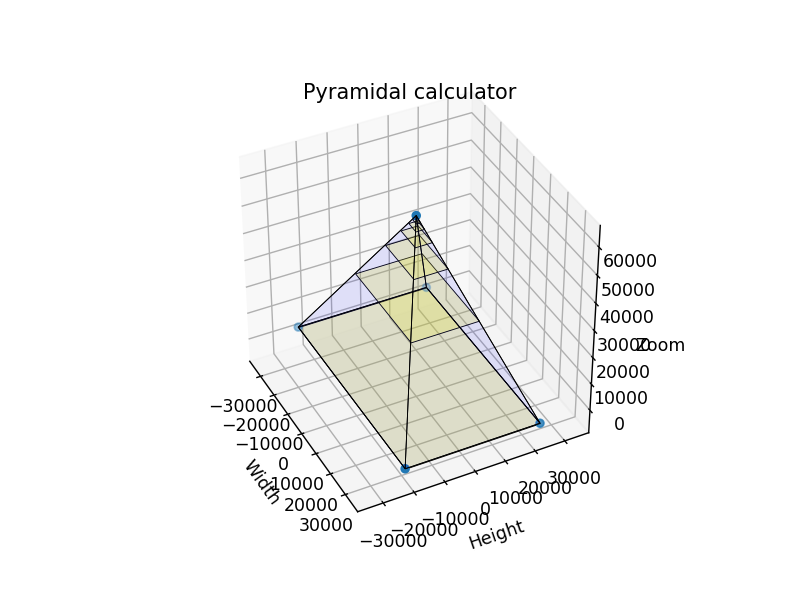

In [57]:
#Plot   
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
  
#pyramid vertex
ax.scatter3D(X, Y, Z)
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Zoom')
ax.set_title('Pyramidal calculator')

max_range = np.array([X.max()-X.min(), 
                      Y.max()-Y.min(), 
                      Z.max()-Z.min()]).max() / 2.0

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Sides and edges
ax.add_collection3d(Poly3DCollection(verts, alpha=0.05, facecolor = 'blue', 
                                     linewidths=.5, edgecolors='k'))

# Level planes
for k in range(0, nLevels):
    uPyramid = [[newVerts[k][0], newVerts[k][1], newVerts[k][2], newVerts[k][3]]]
    ax.add_collection3d(Poly3DCollection(uPyramid, alpha=0.2, facecolor = 'yellow',
                                         linewidths=.5, edgecolors='k'))
